In [1]:
import pandas as pd
from pathlib import Path
import logging

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_and_prepare_data(filename):
    # read csv
    print(f'Loading csv file {filename}')
    df = pd.read_csv(filename, index_col=0)
    if df.empty:
        return df
    # change columns types
    df = df.astype({'language': 'category'})
    df.pushed_at = pd.to_datetime(df.pushed_at)
    df.updated_at = pd.to_datetime(df.updated_at)
    df = df.set_index('id')
    return df


def exclude_unmaintained(df):
    mask = pd.to_datetime(df.pushed_at) > '2020-07-01'
    print(f'excluding {len(df) - sum(mask)} unmaintained items')
    return df[mask]

## Load and prepare github search results

In [3]:
path = Path(r'C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\github_raw_results')
data = {filename:load_and_prepare_data(filename) for filename in path.glob('github_results_query*.csv')}
manually_added = load_and_prepare_data(Path('manually_added.csv'))
manually_added_snowballing = load_and_prepare_data(Path('manually_added_snowballing.csv'))
manually_added_snowballing_papers = load_and_prepare_data(Path('manually_added_snowballing_papers.csv'))

Loading csv file C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\github_raw_results\github_results_query_signal-processing.csv
Loading csv file C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\github_raw_results\github_results_query_time-series-analysis.csv
Loading csv file C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\github_raw_results\github_results_query_time-series-classification.csv
Loading csv file C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\github_raw_results\github_results_query_time-series-clustering.csv
Loading csv file C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\github_raw_results\github_results_query_time-series-data-mining.csv
Loading csv file C:\Users\siebert\PycharmProjects\interactive-time-series-analysis\review\search\github_raw_results\github_results_query_time-series-decomposition.csv
Loading csv fil

## Displaying the numer of items returned by topics

In [4]:
nb_items = pd.Series({str(k.stem)[21:]:v.shape[0] for k,v in data.items()})

# manually add tsfresh
#nb_items['manually-added'] = manually_added.shape[0]

nb_items.sort_values(ascending=True, inplace=True)

In [5]:
nb_items

time-series-decomposition      0
time-series-forecast           0
time-series-visualization      0
timeseries-forecasting         0
time-series-clustering         1
time-series-data-mining        1
time-series-segmentation       1
time-series-prediction         2
time-series-regression         2
timeseries-analysis            3
time-series-classification     7
time-series-forecasting        7
time-series-analysis          12
timeseries                    15
signal-processing             20
time-series                   44
dtype: int64

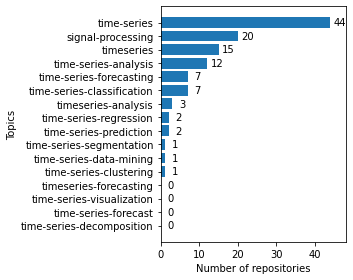

In [9]:

fig, ax = plt.subplots(figsize=(5,4))
rects1 = ax.barh(nb_items.index, nb_items.values)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Topics')
ax.set_xlabel('Number of repositories')
# ax.set_title('Number of repositories per topic')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, -5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
ax.set_xlim(0,48)
fig.tight_layout()

plt.savefig('../latex/images/nb-items-per-topics.pdf')

## Merging all data

In [41]:
dataframe = pd.concat(data.values(), axis=0)

In [42]:
dataframe = pd.concat([
    dataframe, manually_added, manually_added_snowballing, manually_added_snowballing_papers
], axis=0)

In [43]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, 23389271 to 6309729
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   node_id            135 non-null    object             
 1   name               135 non-null    object             
 2   full_name          135 non-null    object             
 3   private            135 non-null    bool               
 4   owner              135 non-null    object             
 5   html_url           135 non-null    object             
 6   description        135 non-null    object             
 7   fork               135 non-null    bool               
 8   url                135 non-null    object             
 9   forks_url          135 non-null    object             
 10  keys_url           135 non-null    object             
 11  collaborators_url  135 non-null    object             
 12  teams_url          135 non-null    obje

## Find and remove duplicates

In [44]:
duplicates = dataframe[dataframe.duplicated(keep='first')].sort_values(by='name')

In [45]:
print(f'found {len(duplicates.full_name.unique())} duplicated unique repositories')
print(
    '. '.join([f'\href[{vals[0]}][{vals[1]}]' for i, vals in duplicates[['html_url', 'name']].drop_duplicates().iterrows()])
)

found 24 duplicated unique repositories
\href[https://github.com/KDD-OpenSource/DeepADoTS][DeepADoTS]. \href[https://github.com/hfawaz/InceptionTime][InceptionTime]. \href[https://github.com/laszukdawid/PyEMD][PyEMD]. \href[https://github.com/LongxingTan/Time-series-prediction][Time-series-prediction]. \href[https://github.com/shubhomoydas/ad_examples][ad_examples]. \href[https://github.com/firmai/atspy][atspy]. \href[https://github.com/exoplanet-dev/exoplanet][exoplanet]. \href[https://github.com/AIStream-Peelout/flow-forecast][flow-forecast]. \href[https://github.com/awslabs/gluon-ts][gluon-ts]. \href[https://github.com/heidelbergcement/hcrystalball][hcrystalball]. \href[https://github.com/KeplerGO/lightkurve][lightkurve]. \href[https://github.com/regel/loudml][loudml]. \href[https://github.com/matrix-profile-foundation/matrixprofile][matrixprofile]. \href[https://github.com/ourownstory/neural_prophet][neural_prophet]. \href[https://github.com/PYFTS/pyFTS][pyFTS]. \href[https://githu

In [46]:
length_before_drop = len(dataframe)
dataframe = dataframe.drop_duplicates(subset='name')
print(f'dropping {length_before_drop - len(dataframe)} rows')

dropping 34 rows


In [47]:
# sanity check
assert len(dataframe.name.unique()) == len(dataframe), 'still have duplicates!'

In [48]:
dataframe.shape

(101, 77)

## Checking if package is indexed by Pypi.org

In [99]:
import requests

In [100]:
headers = {'Content-Type': 'application/json'}

In [101]:
is_package = {name: requests.get(f'https://pypi.org/pypi/{name}/json', headers=headers).status_code == 200 for name in dataframe.name}

In [102]:
is_package = pd.Series(is_package)

In [103]:
is_package.sum()

57

In [104]:
dataframe = dataframe.join(pd.Series(is_package, name='is_package'), on='name')

In [105]:
dataframe.is_package.sum()

57

## Saving preprocessed results

In [49]:
dataframe.to_csv('preprocessed_results.csv', index=True)